# Week7 - Tree Assignment

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the training set.
- train a logistic regression model on the training set
- train a random forest model on the training set
- Which model performed better?
- Which features were most relevant in each model (a part from random forest)?
- Use grid search to improve performance on the best performed model

Load the breast cancer dataset using datasets.load_breast_cancer()

In [126]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
features = cancer["data"]
target = cancer["target"]
print("Shape of features:", features.shape)
print("Shape of target:", target.shape)


Shape of features: (569, 30)
Shape of target: (569,)



Use scatter plots to look at the data (use different colors for the classes)

--------
Here i am taking some features for scatter plot so i have selected first feature and second feature ...

Same way we can take any two features and we can give index and can get desired output.

and also we can use loop over every features twice and can present all scatter plots.

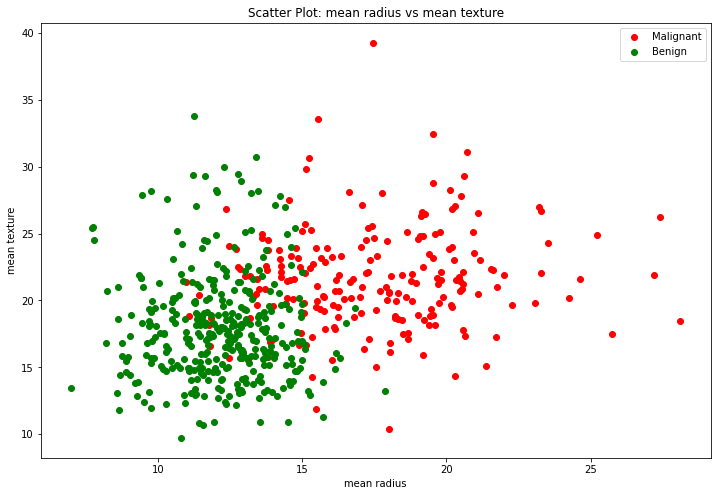

In [127]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

feature_names = cancer.feature_names
feature_names
# Create scatter plots for selected feature pairs
plt.figure(figsize=(12, 8))

#giving indexs for mean radius and texture 
feature1_mean_radius = 0  
feature_2_mean_texture = 1 
#Scallter plots for Maligant (class == 0) and Benign (class == 1)
plt.scatter(features[target == 0, feature1_mean_radius], features[target == 0, feature_2_mean_texture], color='red', label='Malignant')


plt.scatter(features[target == 1, feature1_mean_radius], features[target == 1, feature_2_mean_texture], color='green', label='Benign')

# Set labels and title
plt.xlabel(feature_names[feature1_mean_radius])
plt.ylabel(feature_names[feature_2_mean_texture])
plt.title(f'Scatter Plot: {feature_names[feature1_mean_radius]} vs {feature_names[feature_2_mean_texture]}')
plt.legend()
plt.show()


Use box plots to look at the data


below is the box plots  for individual  feature .

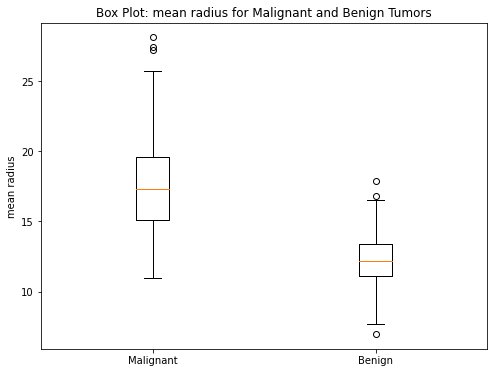

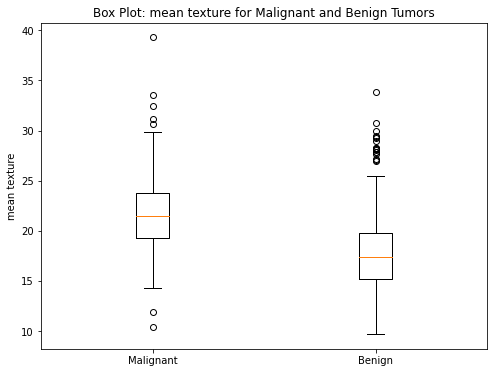

In [128]:

# Create box plots for the selected features based on the target classes (malignant and benign)
plt.figure(figsize=(8, 6))
plt.boxplot([features[target == 0, feature1_mean_radius], features[target == 1, feature1_mean_radius]], labels=['Malignant', 'Benign'])
plt.ylabel(feature_names[feature1_mean_radius])
plt.title(f'Box Plot: {feature_names[feature1_mean_radius]} for Malignant and Benign Tumors')
plt.show()
plt.figure(figsize=(8, 6))
plt.boxplot([features[target == 0, feature_2_mean_texture], features[target == 1, feature_2_mean_texture]], labels=['Malignant', 'Benign'])
plt.ylabel(feature_names[feature_2_mean_texture])
plt.title(f'Box Plot: {feature_names[feature_2_mean_texture]} for Malignant and Benign Tumors')
plt.show()

 created a function for loading the dataset  - > load_breast_cancer_data()
    
 Actually there is no need of loading it again as we can draw variables from above but for better understanding.
 
 Created another function  - >. plot_feature_boxplots()
 where we gone loop through features for ploting .

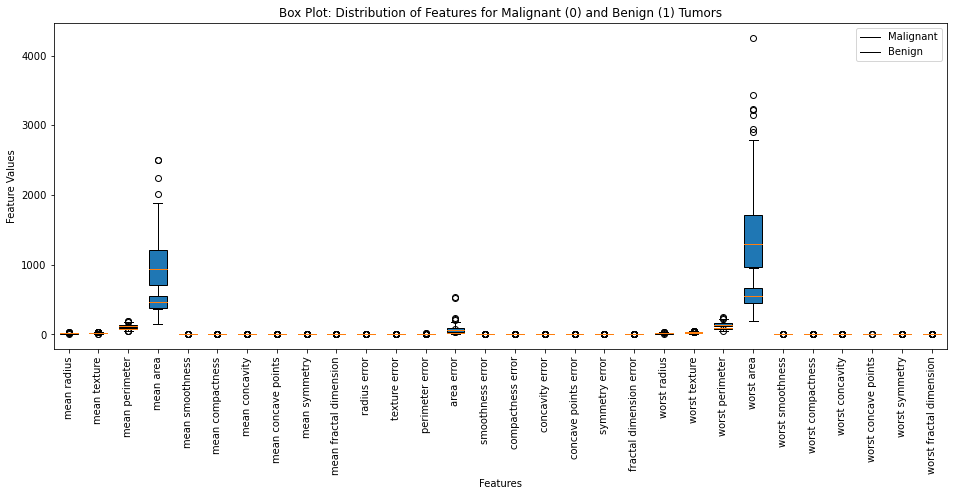

In [129]:

def load_breast_cancer_data():
    data = load_breast_cancer()
    features = data.data
    target = data.target
    feature_names = data.feature_names
    return features, target, feature_names

def plot_feature_boxplots(features, target, feature_names):
    plt.figure(figsize=(16, 6))
    positions = range(1, len(feature_names) + 1)

    for idx, feature_name in enumerate(feature_names):
        malignant_values = features[target == 0, idx]
        benign_values = features[target == 1, idx]

        plt.boxplot([malignant_values, benign_values], positions=[positions[idx]]*2, widths=0.6, patch_artist=True)

    plt.xticks(positions, feature_names, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Feature Values')
    plt.title('Box Plot: Distribution of Features for Malignant (0) and Benign (1) Tumors')
    plt.legend(['Malignant', 'Benign'], loc='upper right')
    plt.show()

features, target, feature_names = load_breast_cancer_data()
plot_feature_boxplots(features, target, feature_names)


create a training and test set with random_state = 3

In [130]:
from sklearn.model_selection import train_test_split
random_state = 3

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=random_state)

# Print the shapes of the training and test sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


train a decision tree model on the training set

In [131]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=3)

# Train the Decision Tree model on the training set
decision_tree.fit(X_train, y_train)




DecisionTreeClassifier(random_state=3)

train a logistic regression model on the training set

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_after_scaler = scaler.fit_transform(X_train)
X_test_after_scaler = scaler.transform(X_test)

logistic_regression = LogisticRegression(random_state=3, max_iter=1000)
logistic_regression.fit(X_train_after_scaler, y_train)

LogisticRegression(max_iter=1000, random_state=3)

train a random forest model on the training set

In [133]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=3)

# Train the Random Forest model on the training set
random_forest.fit(X_train, y_train)



RandomForestClassifier(random_state=3)

Which model performed better?

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions using Decision Tree model
dt_predictions = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Model:")
print("Accuracy:", dt_accuracy)
print()
# Predictions using Logistic Regression model
lr_predictions = logistic_regression.predict(X_test_after_scaler)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Model:")
print("Accuracy:", lr_accuracy)
print()

# Predictions using Random Forest model
rf_predictions = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)



print("Random Forest Model:")
print("Accuracy:", rf_accuracy)




Decision Tree Model:
Accuracy: 0.8947368421052632

Logistic Regression Model:
Accuracy: 0.9736842105263158

Random Forest Model:
Accuracy: 0.9385964912280702


Which features were most relevant in each model (a part from random forest)?

In [136]:
# Get feature importances from Decision Tree model
dt_feature_importances = decision_tree.feature_importances_
dt_feature_importance_dict = dict(zip(feature_names, dt_feature_importances))
sorted_dt_feature_importance = sorted(dt_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Most Relevant Features for Decision Tree Model:")
for feature, importance in sorted_dt_feature_importance:
    print(f"{feature}: {importance:.4f}")


Most Relevant Features for Decision Tree Model:
worst concave points: 0.7077
worst area: 0.1572
mean texture: 0.0351
area error: 0.0282
worst concavity: 0.0178
worst smoothness: 0.0115
texture error: 0.0092
worst perimeter: 0.0091
mean smoothness: 0.0078
worst symmetry: 0.0075
symmetry error: 0.0047
mean concavity: 0.0037
worst texture: 0.0005
mean radius: 0.0000
mean perimeter: 0.0000
mean area: 0.0000
mean compactness: 0.0000
mean concave points: 0.0000
mean symmetry: 0.0000
mean fractal dimension: 0.0000
radius error: 0.0000
perimeter error: 0.0000
smoothness error: 0.0000
compactness error: 0.0000
concavity error: 0.0000
concave points error: 0.0000
fractal dimension error: 0.0000
worst radius: 0.0000
worst compactness: 0.0000
worst fractal dimension: 0.0000


worst concave points with  0.7077 is most relevent in Decision Tree model

In [137]:
# Get feature coefficients from Logistic Regression model
lr_feature_coefficients = logistic_regression.coef_[0]
lr_feature_coefficient_dict = dict(zip(feature_names, lr_feature_coefficients))
sorted_lr_feature_coefficients = sorted(lr_feature_coefficient_dict.items(), key=lambda x: abs(x[1]), reverse=True)
print("Most Relevant Features for Logistic Regression Model:")
for feature, coefficient in sorted_lr_feature_coefficients:
    print(f"{feature}: {coefficient:.4f}")


Most Relevant Features for Logistic Regression Model:
radius error: -1.3216
worst texture: -1.1516
worst concavity: -1.1018
worst symmetry: -1.0263
worst radius: -0.9735
worst area: -0.9395
area error: -0.9157
worst smoothness: -0.8979
worst perimeter: -0.7959
mean concavity: -0.7933
perimeter error: -0.7772
mean concave points: -0.7414
compactness error: 0.6959
worst concave points: -0.6475
mean area: -0.6292
mean compactness: 0.6063
mean radius: -0.5544
mean perimeter: -0.5255
fractal dimension error: 0.4284
mean fractal dimension: 0.4009
symmetry error: 0.3149
mean texture: -0.3087
worst fractal dimension: -0.3081
concave points error: -0.2453
smoothness error: -0.2136
concavity error: 0.1853
texture error: -0.1475
mean smoothness: -0.0812
mean symmetry: 0.0380
worst compactness: 0.0104


radius error with  -1.3216  is most relevant in logistic regression

Use grid search to improve performance on the best performed model

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and values to search over
param_grid = {
    'solver': ['liblinear'], 
    'penalty': ['l1'],      
    'max_iter': [100, 1000]
}

# Create a Random Forest Classifier
logestic_regression_model = LogisticRegression(random_state=3)


# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=logestic_regression_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fitting the grid search to the training data
grid_search.fit(X_train_after_scaler, y_train)

# Printing the best hyperparameters and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Model Accuracy:", grid_search.best_score_)



Best Hyperparameters: {'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model Accuracy: 0.9780219780219781


Here according to the accuracy we can say that logistic regression is best model. why beacuse we have used scalar which 
helped logistic regression for getting better accuracy .

Here we need to focus on type of data for example :
    
    If you have a moderately large dataset and the relationships between features and the target variable are relatively simple, Logistic Regression might be a good choice due to its efficiency.
    
    If you have a large dataset with a substantial number of samples and features, Random Forest can handle complex relationships in the data and is capable of capturing non-linear patterns.
    
    
Here we have relatively small dataset so its better to consider logistic regression:
    
    With a small dataset, it's generally advisable to start with simpler models like Logistic Regression. Simple models have fewer parameters, making them less prone to overfitting when data is limited. Logistic Regression assumes a linear relationship between features and the target variable, which can be a reasonable assumption for small datasets with limited complexity.
    
    
In summary, there is no one-size-fits-all answer. It's essential to experiment with both Logistic Regression and Random Forest (as well as other suitable algorithms) on your large dataset, considering the factors mentioned above, to determine which model performs best for your specific use case.